In [12]:
import pandas as pd 
import matplotlib.pyplot as plt

In [34]:
OCH3 = pd.read_csv('OCH3/OCH3_63_out.csv')
OH = pd.read_csv('OH/OH_out.csv')
CO = pd.read_csv('CO/CO_out.csv')
MC = pd.read_csv('MC/MC_out.csv')

In [56]:
MC

,# n_neighbors,slab_index,site_index,metal_index,energy
0,1,0,0,3,-1.947327
1,1,0,1,0,-0.942536
2,1,0,2,3,-1.999077
3,1,0,3,3,-1.991497
4,1,0,4,1,-1.585895
...,...,...,...,...,...
994,1,110,4,4,-2.533378
995,1,110,5,1,-1.791705
996,1,110,6,5,-1.442276
997,1,110,7,5,-1.584506


In [14]:
OCH3_ = OCH3.drop(labels=[390, 690])


In [35]:
OCH3_top = OCH3_[OCH3_['# n_neighbors'] <= 1]
OH_top = OH[OH['# n_neighbors'] <= 1]
CO_top = CO[CO['# n_neighbors'] <= 1]
MC_top = MC[MC['# n_neighbors'] <= 1]

In [16]:
OCH3_top = OCH3_[OCH3_['# n_neighbors'] >= 2]
OH_top = OH[OH['# n_neighbors'] == 3]

In [9]:
OCH3_top 

,# n_neighbors,slab_index,site_index,metal_index,energy
15,3,1,6,1,-0.413932
16,3,1,7,0,-0.715531
17,3,1,7,0,-0.713252
18,3,2,0,5,-1.464405
19,3,2,1,2,-1.466490
...,...,...,...,...,...
991,2,110,1,5,-1.648152
992,2,110,2,1,-1.126294
996,3,110,6,5,-1.059358
997,2,110,7,5,-1.729693


In [11]:
OH_top

,# n_neighbors,slab_index,site_index,metal_index,energy
9,3,1,1,3,1.077764
16,3,1,7,0,0.819337
17,3,1,8,0,0.841159
18,3,2,0,5,0.041632
19,3,2,1,2,0.061567
...,...,...,...,...,...
981,3,109,0,0,0.226178
988,3,109,4,5,0.011357
991,3,110,1,5,-0.272390
992,3,110,2,1,-0.230553


In [35]:
OH_top['metal_index']

0      3
1      0
2      3
3      3
4      1
      ..
994    4
995    1
996    5
997    5
998    0
Name: metal_index, Length: 999, dtype: int64

In [51]:
# Assuming 'energy' is the column name you want to calculate the average for
average_energy_per_metal = MC_top.groupby('metal_index')['energy'].mean()

# Print the average energy for each metal index
print(average_energy_per_metal)


metal_index
0   -1.148947
1   -1.545950
2   -1.563064
3   -1.948215
4   -2.405129
5   -1.421876
Name: energy, dtype: float64


In [47]:
MC_Ag= OCH3_top[OCH3_top['metal_index'] == 0]
MC_Au= OCH3_top[OCH3_top['metal_index'] == 1]
MC_Cu= OCH3_top[OCH3_top['metal_index'] == 2]
MC_Pd= OCH3_top[OCH3_top['metal_index'] == 3]
MC_Pt= OCH3_top[OCH3_top['metal_index'] == 4]
MC_Zn= OCH3_top[OCH3_top['metal_index'] == 5]

print(MC_Ag)
print(MC_Au)
print(MC_Cu)
print(MC_Pd)
print(MC_Pt)
print(MC_Zn)

     # n_neighbors  slab_index  site_index  metal_index    energy
1                1           0           1            0  0.049283
5                1           0           5            0 -0.020419
11               1           1           2            0 -0.019298
37               1           4           1            0 -0.152354
47               1           5           2            0 -0.125853
..             ...         ...         ...          ...       ...
887              1          98           5            0 -0.177826
888              1          98           6            0 -0.119669
901              1         100           1            0 -0.118497
964              1         107           1            0 -0.102279
993              1         110           3            0 -0.206251

[75 rows x 5 columns]
     # n_neighbors  slab_index  site_index  metal_index    energy
4                1           0           4            1 -0.156979
6                1           0           6           

In [220]:
MC_lowCu = MC_Cu[MC_Cu['energy'] <= -2]
MC_lowCu

,# n_neighbors,slab_index,site_index,metal_index,energy
321,1,35,6,2,-2.477452
558,1,62,3,2,-2.478805
612,1,68,0,2,-2.621405


In [36]:
OH_OCH3 = pd.merge(OH_top, OCH3_top, on=['slab_index', 'site_index','metal_index'], suffixes=('_OH', '_OCH3'))
OH_CO = pd.merge(OH_top, CO_top, on=['slab_index', 'site_index','metal_index'], suffixes=('_OH', '_CO'))
OCH3_CO = pd.merge(CO_top, OCH3_top, on=['slab_index', 'site_index','metal_index'], suffixes=('_CO', '_OCH3'))
OH_MC = pd.merge(OH_top, MC_top, on=['slab_index', 'site_index','metal_index'], suffixes=('_OH', '_MC'))
MC_CO = pd.merge(MC_top, CO_top, on=['slab_index', 'site_index','metal_index'], suffixes=('_MC', '_CO'))
OCH3_MC = pd.merge(MC_top, OCH3_top, on=['slab_index', 'site_index','metal_index'], suffixes=('_MC', '_OCH3'))

In [37]:
#farve til metaller
metal_colors = {0: 'silver', 1:'gold', 2: 'darkorange', 3: 'blue', 4: 'green', 5: 'purple'}
metal_names = {0: 'Ag', 1: 'Au', 2: 'Cu', 3: 'Pd', 4: 'Pt', 5: 'Zn'}


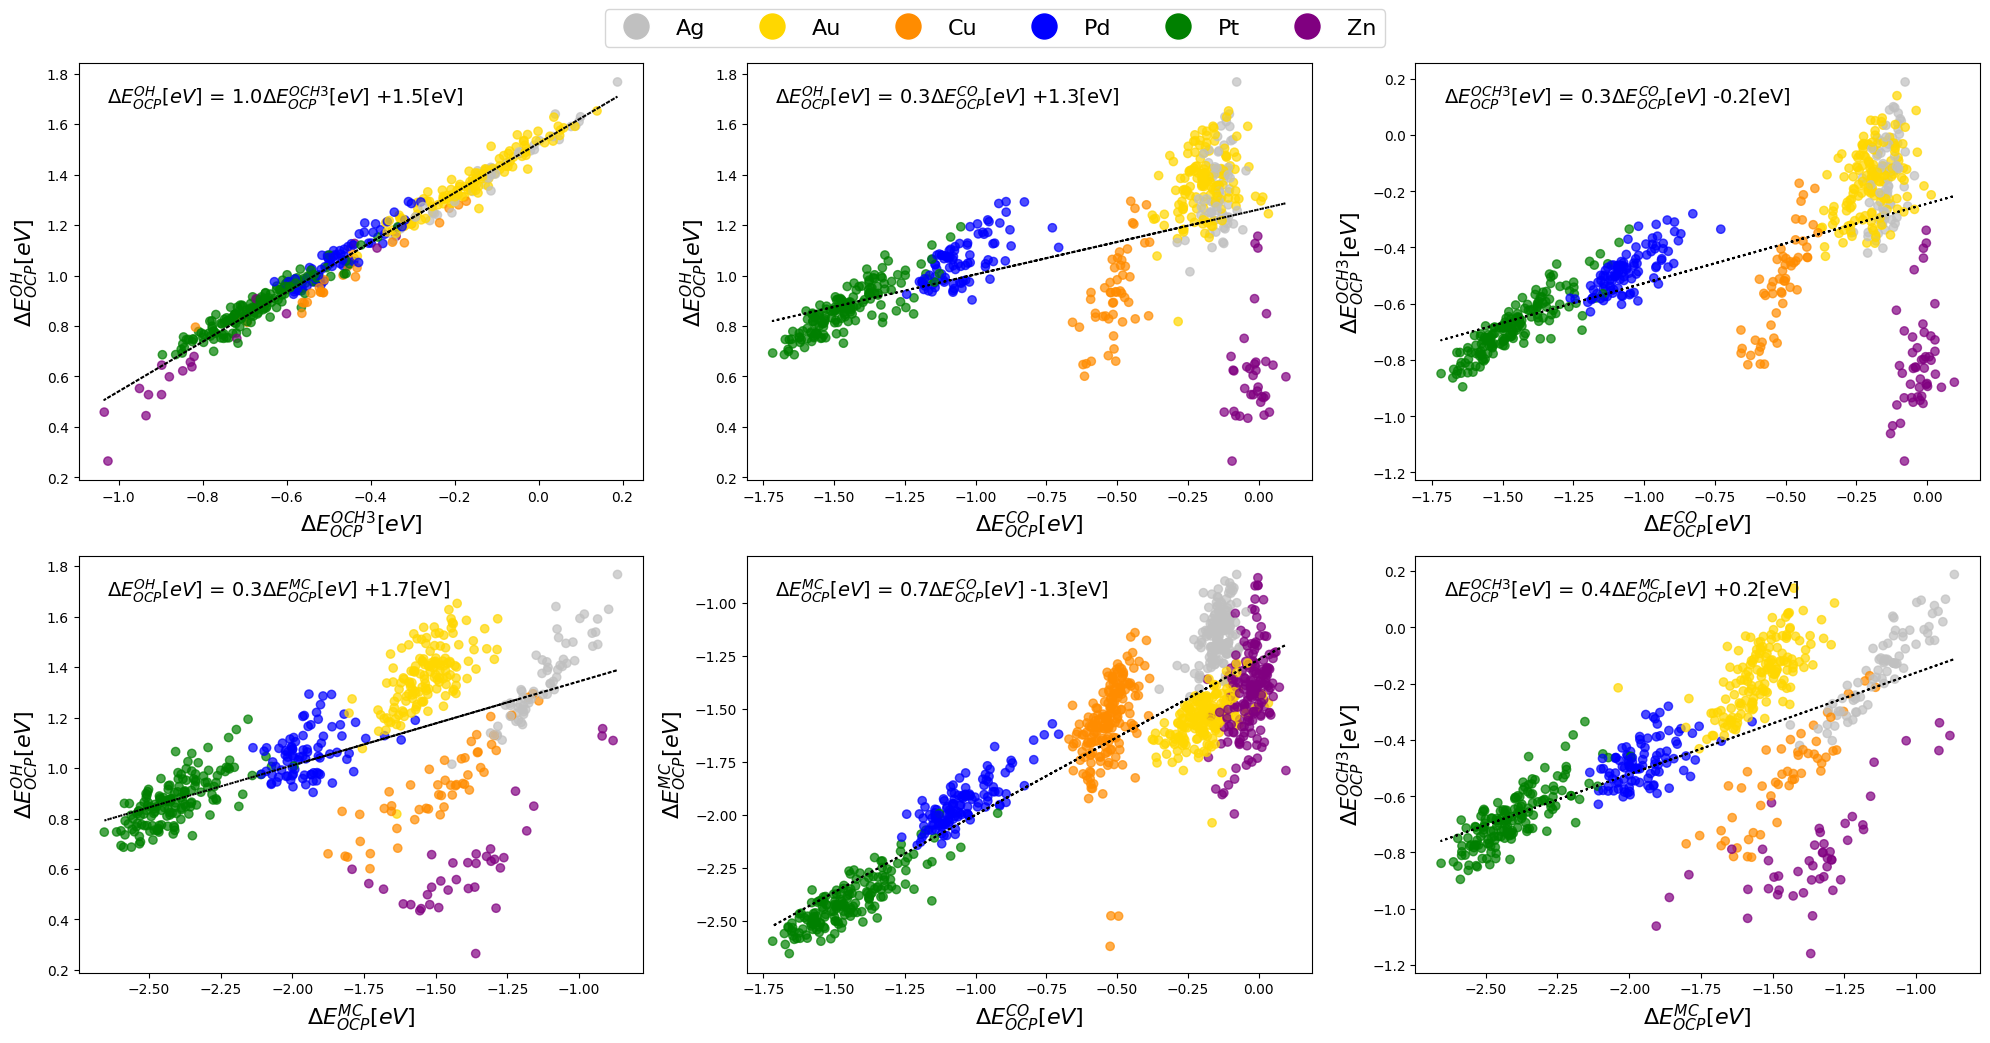

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats


# List of data and labels
data_list = [(OH_OCH3, 'energy_OCH3', 'energy_OH'),
             (OH_CO, 'energy_CO', 'energy_OH'),
             (OCH3_CO, 'energy_CO', 'energy_OCH3'),
             (OH_MC, 'energy_MC', 'energy_OH'),
             (MC_CO, 'energy_CO', 'energy_MC'),
             (OCH3_MC, 'energy_MC', 'energy_OCH3')]

# Create a 3x2 subplot
fig, axs = plt.subplots(2, 3, figsize=(20, 10))

for ax, (data, x_col, y_col) in zip(axs.flatten(), data_list):
    x = data[x_col]
    y = data[y_col]
    m, b, *_ = stats.linregress(x, y)
    
    ax.scatter(x, y, c=data['metal_index'].map(metal_colors), alpha=0.7)
    ax.plot(x, m * x + b, color='black', linestyle='dotted')
    
    x_label = r'$\Delta E^{' + x_col.split('_')[-1] + r'}_{OCP}[eV]$'
    y_label = r'$\Delta E^{' + y_col.split('_')[-1] + r'}_{OCP}[eV]$'
    equation_text = f'{y_label} = {m:.1f}{x_label} {b:+.1f}[eV]'
    ax.text(0.05, 0.95, equation_text, transform=ax.transAxes, color='black', verticalalignment='top', horizontalalignment='left', fontsize = 14)
    
    ax.set_xlabel(x_label, fontsize = 16)
    ax.set_ylabel(y_label, fontsize = 16)

# Create legend elements
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=f'{metal_names.get(metal, "Unknown")}', markerfacecolor=color, markersize=20) for metal, color in metal_colors.items()]

# Adjust layout to minimize margins and add space for the legend
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Add the legend
fig.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=len(metal_colors), fontsize=16)

    
plt.tight_layout()

# Save the figure
plt.savefig('ScalingALL/all_plots.png', bbox_inches='tight', dpi=300)

plt.show()


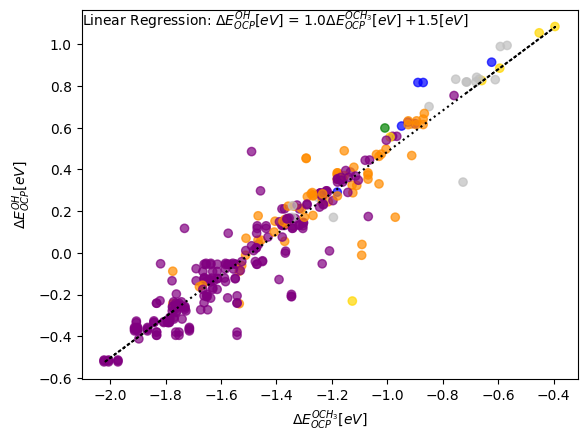

In [29]:
from scipy import stats

data = OH_OCH3

x = data['energy_OCH3']
y = data['energy_OH']

m, b, *_ = stats.linregress(x, y)

# Plotting the data points with color-coded metal index
plt.scatter(x, y,
            c=data['metal_index'].map(metal_colors),
            label='Metal Index',
            alpha=0.7)

# Plotting the dotted linear regression line in black
plt.plot(x, m * x + b, color='black', linestyle='dotted', label='_nolegend_')  # Add '_nolegend_' to exclude from legend

# Adding the equation text to the plot
x_label = r'$\Delta E^{OCH_3}_{OCP}[eV]$'
y_label = r'$\Delta E^{OH}_{OCP}[eV]$'
l = r'$[eV]$'
equation_text = f'Linear Regression: {y_label} = {m:.1f}{x_label} {b:+.1f}{l}'
plt.text(plt.xlim()[0], plt.ylim()[1], equation_text, color='black', verticalalignment='top', horizontalalignment='left')

plt.xlabel(x_label)
plt.ylabel(y_label)

# Legend in the top center
#legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=f'{metal_names.get(metal, "Unknown")} ', markerfacecolor=color, markersize=10) for metal, color in metal_colors.items()]

# Position of the legend
#plt.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=len(metal_colors), fontsize='x-small')

#plt.savefig('Scaling/'+'OH_OCH3'+'.png')

plt.show()


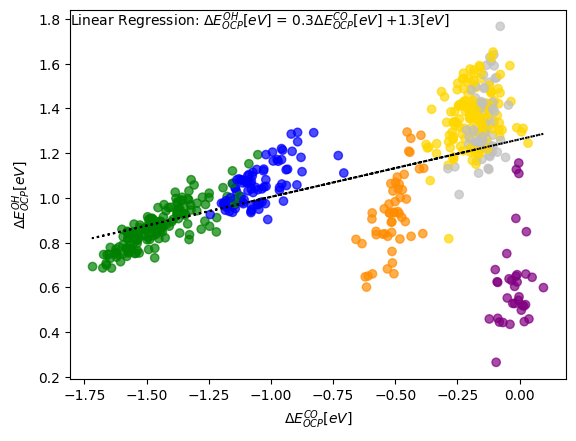

In [25]:
from scipy import stats

data = OH_CO

x = data['energy_CO']
y = data['energy_OH']

m, b, *_ = stats.linregress(x, y)

# Plotting the data points with color-coded metal index
plt.scatter(x, y,
            c=data['metal_index'].map(metal_colors),
            label='Metal Index',
            alpha=0.7)

# Plotting the dotted linear regression line in black
plt.plot(x, m * x + b, color='black', linestyle='dotted', label='_nolegend_')  # Add '_nolegend_' to exclude from legend

# Adding the equation text to the plot
x_label = r'$\Delta E^{CO}_{OCP}[eV]$'
y_label = r'$\Delta E^{OH}_{OCP}[eV]$'
l = r'$[eV]$'
equation_text = f'Linear Regression: {y_label} = {m:.1f}{x_label} {b:+.1f}{l}'
plt.text(plt.xlim()[0], plt.ylim()[1], equation_text, color='black', verticalalignment='top', horizontalalignment='left')

plt.xlabel(x_label)
plt.ylabel(y_label)

# Legend in the top center
#legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=f'{metal_names.get(metal, "Unknown")}', markerfacecolor=color, markersize=10) for metal, color in metal_colors.items()]

# Position of the legend
#plt.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=len(metal_colors), fontsize='x-small')

plt.savefig('Scaling/'+'OH_CO'+'.png')
plt.show()



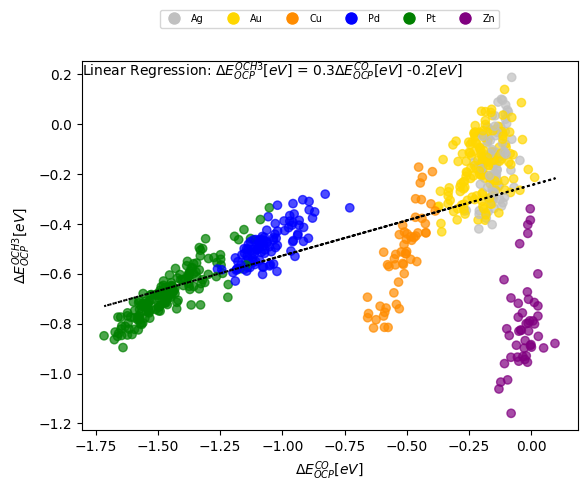

In [53]:
from scipy import stats

data = OCH3_CO

x = data['energy_CO']
y = data['energy_OCH3']

m, b, *_ = stats.linregress(x, y)

# Plotting the data points with color-coded metal index
plt.scatter(x, y,
            c=data['metal_index'].map(metal_colors),
            label='Metal Index',
            alpha=0.7)

# Plotting the dotted linear regression line in black
plt.plot(x, m * x + b, color='black', linestyle='dotted', label='_nolegend_')  # Add '_nolegend_' to exclude from legend

# Adding the equation text to the plot
x_label = r'$\Delta E^{CO}_{OCP}[eV]$'
y_label = r'$\Delta E^{OCH3}_{OCP}[eV]$'
l = r'$[eV]$'
equation_text = f'Linear Regression: {y_label} = {m:.1f}{x_label} {b:+.1f}{l}'
plt.text(plt.xlim()[0], plt.ylim()[1], equation_text, color='black', verticalalignment='top', horizontalalignment='left')

plt.xlabel(x_label)
plt.ylabel(y_label)

# Legend in the top center
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=f'{metal_names.get(metal, "Unknown")}', markerfacecolor=color, markersize=10) for metal, color in metal_colors.items()]

# Position of the legend
plt.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=len(metal_colors), fontsize='x-small')

plt.savefig('Scaling/'+'OCH3_CO'+'.png')

plt.show()



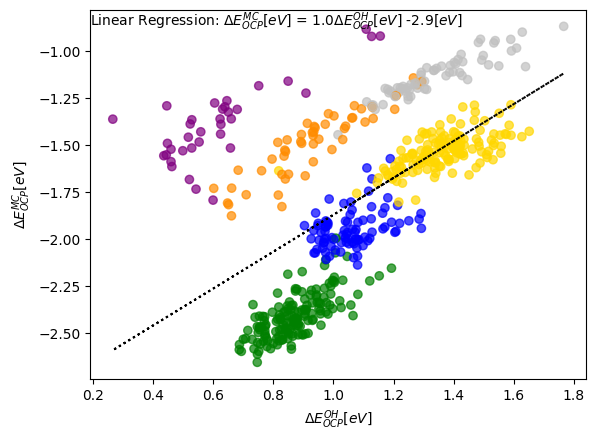

In [28]:
from scipy import stats

data = OH_MC

x = data['energy_OH']
y = data['energy_MC']

m, b, *_ = stats.linregress(x, y)

# Plotting the data points with color-coded metal index
plt.scatter(x, y,
            c=data['metal_index'].map(metal_colors),
            label='Metal Index',
            alpha=0.7)

# Plotting the dotted linear regression line in black
plt.plot(x, m * x + b, color='black', linestyle='dotted', label='_nolegend_')  # Add '_nolegend_' to exclude from legend

# Adding the equation text to the plot
x_label = r'$\Delta E^{OH}_{OCP}[eV]$'
y_label = r'$\Delta E^{MC}_{OCP}[eV]$'
l = r'$[eV]$'
equation_text = f'Linear Regression: {y_label} = {m:.1f}{x_label} {b:+.1f}{l}'
plt.text(plt.xlim()[0], plt.ylim()[1], equation_text, color='black', verticalalignment='top', horizontalalignment='left')

plt.xlabel(x_label)
plt.ylabel(y_label)

# Legend in the top center
#legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=f'{metal_names.get(metal, "Unknown")}', markerfacecolor=color, markersize=10) for metal, color in metal_colors.items()]

# Position of the legend
#plt.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=len(metal_colors), fontsize='x-small')


plt.savefig('Scaling/'+'OH_MC'+'.png')
plt.show()




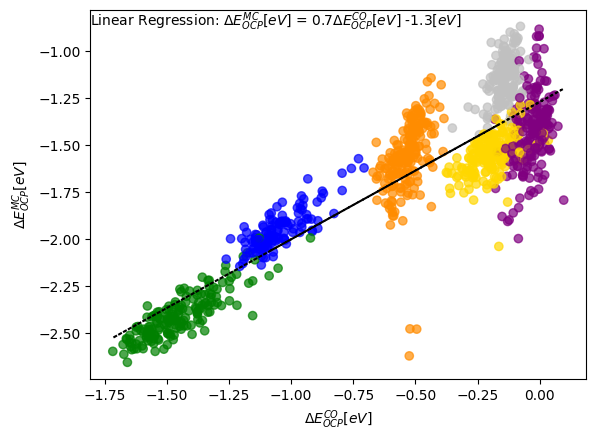

In [29]:
from scipy import stats

data = MC_CO

x = data['energy_CO']
y = data['energy_MC']

m, b, *_ = stats.linregress(x, y)

# Plotting the data points with color-coded metal index
plt.scatter(x, y,
            c=data['metal_index'].map(metal_colors),
            label='Metal Index',
            alpha=0.7)

# Plotting the dotted linear regression line in black
plt.plot(x, m * x + b, color='black', linestyle='dotted', label='_nolegend_')  # Add '_nolegend_' to exclude from legend

# Adding the equation text to the plot
x_label = r'$\Delta E^{CO}_{OCP}[eV]$'
y_label = r'$\Delta E^{MC}_{OCP}[eV]$'
l = r'$[eV]$'
equation_text = f'Linear Regression: {y_label} = {m:.1f}{x_label} {b:+.1f}{l}'
plt.text(plt.xlim()[0], plt.ylim()[1], equation_text, color='black', verticalalignment='top', horizontalalignment='left')

plt.xlabel(x_label)
plt.ylabel(y_label)

# Legend in the top center
#legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=f'{metal_names.get(metal, "Unknown")}', markerfacecolor=color, markersize=10) for metal, color in metal_colors.items()]

# Position of the legend
#plt.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=len(metal_colors), fontsize='x-small')

plt.savefig('Scaling/'+'MC_CO'+'.png')
plt.show()





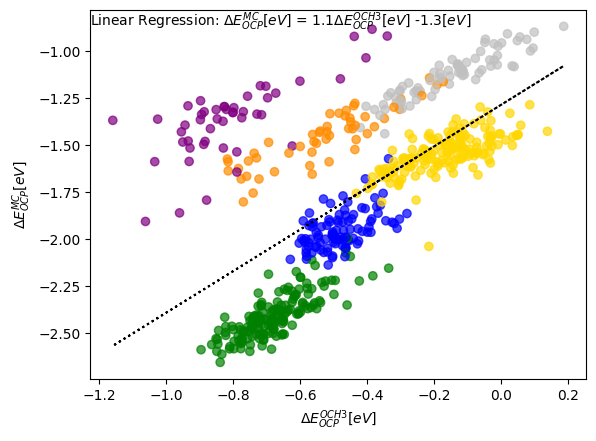

In [30]:
from scipy import stats

data = OCH3_MC

x = data['energy_OCH3']
y = data['energy_MC']

m, b, *_ = stats.linregress(x, y)

# Plotting the data points with color-coded metal index
plt.scatter(x, y,
            c=data['metal_index'].map(metal_colors),
            label='Metal Index',
            alpha=0.7)

# Plotting the dotted linear regression line in black
plt.plot(x, m * x + b, color='black', linestyle='dotted', label='_nolegend_')  # Add '_nolegend_' to exclude from legend

# Adding the equation text to the plot
x_label = r'$\Delta E^{OCH3}_{OCP}[eV]$'
y_label = r'$\Delta E^{MC}_{OCP}[eV]$'
l = r'$[eV]$'
equation_text = f'Linear Regression: {y_label} = {m:.1f}{x_label} {b:+.1f}{l}'
plt.text(plt.xlim()[0], plt.ylim()[1], equation_text, color='black', verticalalignment='top', horizontalalignment='left')

plt.xlabel(x_label)
plt.ylabel(y_label)

# Legend in the top center
#legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=f'{metal_names.get(metal, "Unknown")}', markerfacecolor=color, markersize=10) for metal, color in metal_colors.items()]

# Position of the legend
#plt.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=len(metal_colors), fontsize='x-small')

plt.savefig('Scaling/'+'OCH3_MC'+'.png')
plt.show()



